# Excercise 2 - Logistic Regression

In [1]:
import numpy as np
import pandas as pd
import scipy.optimize as opt
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Load data from file
data = pd.read_csv('ex2data1.txt', header=None, names=['Exam 1', 'Exam 2', 'Admitted'])
data.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


Plot scatterplot of data

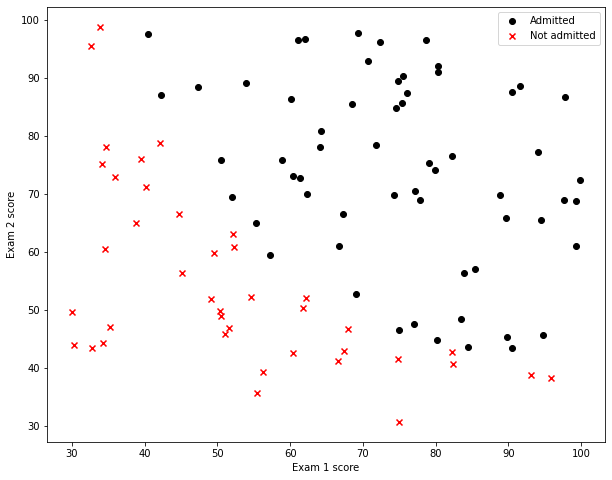

In [3]:
# Find all data points with positive and negative results respectively
pos = data[data['Admitted'].isin([1])]
neg = data[data['Admitted'].isin([0])]

# Plot data
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(pos['Exam 1'], pos['Exam 2'], marker='o', color='black', label='Admitted')
ax.scatter(neg['Exam 1'], neg['Exam 2'], marker='x', color='red', label='Not admitted')
ax.set_xlabel('Exam 1 score')
ax.set_ylabel('Exam 2 score')
ax.legend()

Define and test sigmoid function

In [4]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

test = np.matrix([[0], [1], [-1], [4], [-4]])
sigmoid(test)

matrix([[0.5       ],
        [0.73105858],
        [0.26894142],
        [0.98201379],
        [0.01798621]])

Define cost and gradient functions

In [5]:
def cost_fn(theta, X, y):
    h = sigmoid(X @ theta)
    J = (-1/m) * np.sum(np.multiply(y, np.log(h)) + np.multiply((1-y), np.log(1-h)))
    return J

def grad_fn(theta, X, y):
    h = sigmoid(X @ theta)
    return ((1/m) * X.T @ (h-y))

Prepare data for calculations

In [6]:
# Add column of 1s for intercept value
data.insert(0, '', 1)

# Extract X (training data) and y (result)
X = data.iloc[:, 0:3]
y = data.iloc[:, -1]

# Convert to numpy arrays
X = np.array(X.values)
y = np.array(y.values)

m, n = X.shape

Compute and display cost and gradient with theta = [0, 0, 0]

In [7]:
initial_theta = np.zeros(n)
cost = cost_fn(initial_theta, X, y)
gradient = grad_fn(initial_theta, X, y)
print('Cost at initial theta (zeros): %f' % cost)
print('Expected cost (approx): 0.693')
print('Gradient at initial theta (zeros):')
print(gradient)
print('Expected gradients (approx):\n -0.1000\n -12.0092\n -11.2628')

Cost at initial theta (zeros): 0.693147
Expected cost (approx): 0.693
Gradient at initial theta (zeros):
[ -0.1        -12.00921659 -11.26284221]
Expected gradients (approx):
 -0.1000
 -12.0092
 -11.2628


Compute and display cost and gradient with theta = [-24, 0.2, 0.2]

In [8]:
test_theta = np.array([-24, 0.2, 0.2])
cost = cost_fn(test_theta, X, y)
gradient = grad_fn(test_theta, X, y)
print('Cost at initial theta (zeros): %f' % cost)
print('Expected cost (approx): 0.218')
print('Gradient at initial theta (zeros):')
print(gradient)
print('Expected gradients (approx):\n 0.043\n 2.566\n 2.647')

Cost at initial theta (zeros): 0.218330
Expected cost (approx): 0.218
Gradient at initial theta (zeros):
[0.04290299 2.56623412 2.64679737]
Expected gradients (approx):
 0.043
 2.566
 2.647


Optimizing using fmin_tnc

In [9]:
results = opt.fmin_tnc(func=cost_fn, x0=initial_theta, fprime=grad_fn, args=(X, y))

theta_opt = results[0]
cost = cost_fn(results[0], X, y)

print('Cost at theta found by fminunc: %f' % cost);
print('Expected cost (approx): 0.203');
print('theta:');
print(theta_opt);
print('Expected theta (approx):');
print(' -25.161\n 0.206\n 0.201');


Cost at theta found by fminunc: 0.203498
Expected cost (approx): 0.203
theta:
[-25.16131857   0.20623159   0.20147149]
Expected theta (approx):
 -25.161
 0.206
 0.201


Plot boundary

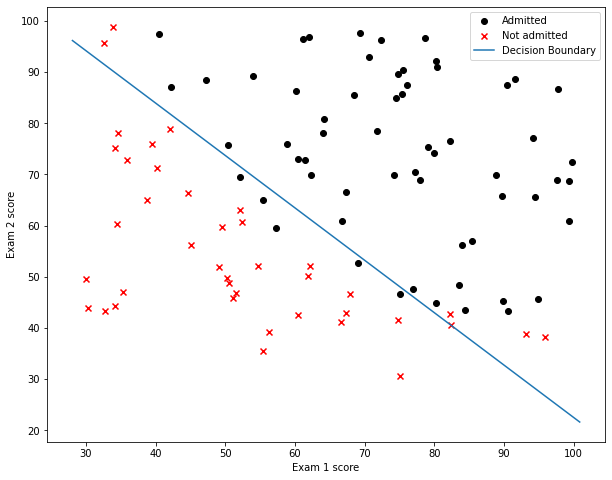

In [10]:
# Find all data points with positive and negative results respectively
pos = data[data['Admitted'].isin([1])]
neg = data[data['Admitted'].isin([0])]

# Plot data
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(pos['Exam 1'], pos['Exam 2'], marker='o', color='black', label='Admitted')
ax.scatter(neg['Exam 1'], neg['Exam 2'], marker='x', color='red', label='Not admitted')

# Calculate x and y values for decision boundary
plot_x = [np.min(X[:,1]-2), np.max(X[:,2]+2)]
plot_y = (-1/theta_opt[2]) * (theta_opt[0] + np.dot(theta_opt[1], plot_x))

# Plot decision boundary
ax.plot(plot_x, plot_y, label="Decision Boundary")

# Set plot details
ax.set_xlabel('Exam 1 score')
ax.set_ylabel('Exam 2 score')
ax.legend()

Predict probability of a student with scores 45 and 85

In [11]:
prob = sigmoid([1, 45, 85] @ theta_opt)

print('For a student with scores 45 and 85, we predict and admission probability of %f' % prob)
print('Expected value: 0.775 +/- 0.002')

For a student with scores 45 and 85, we predict and admission probability of 0.776291
Expected value: 0.775 +/- 0.002


Compute accuracy

In [12]:
def predict(theta, X):
    m, n = X.shape
    p = np.zeros(m)
    z = X @ theta
    threshholds = sigmoid(z)
    for i in range(m):
        p[i] = 1 if threshholds[i] >= 0.5 else 0

    return p

p = predict(theta_opt, X)
accuracy = np.mean(p == y) * 100

print('Train accuracy: %f' % accuracy)
print('Expected accuracy (approx): 89.0')

Train accuracy: 89.000000
Expected accuracy (approx): 89.0
